In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
import numpyro
import tqdm
import jax
import numpyro.distributions as dist

In [37]:
def lnlike(theta, data, err):
    ln_like = -1/2 * ((theta - data) / err)**2
    return ln_like

In [77]:
def lnprior(theta, data, err):
    if np.any(np.abs((theta - data) / err) > 3):
        return -np.inf
    return 0

In [78]:
def lnprob(theta, data, err):
    ln_prior = lnprior(theta, data, err)
    ln_like = lnlike(theta, data, err)
    return ln_prior + ln_like

In [79]:
key = jax.random.PRNGKey(0)

In [80]:
data = np.array([0.4,0.4,0.2])
err = np.array([0.1, 0.05, 0.1])

In [81]:
pos = np.array([0.3,0.3,0.1]) + np.random.normal(0,0.01,size=(64,3))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, lnprob, args=(data, err)
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:04<00:00, 1199.79it/s]


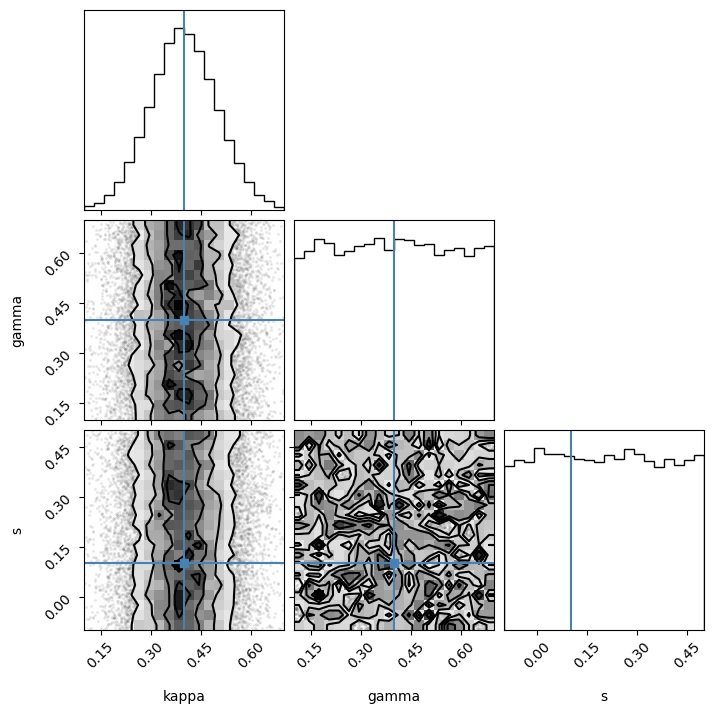

In [82]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    flat_samples, labels=["kappa", "gamma", "s"], truths=[0.4, 0.4, 0.1]
);